In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/Users/sandeep/ensemble_techniques/data/jambore_education.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.shape

(500, 9)

Now, let us drop the irrelevant column and check if there are any null values in the dataset

In [3]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants.

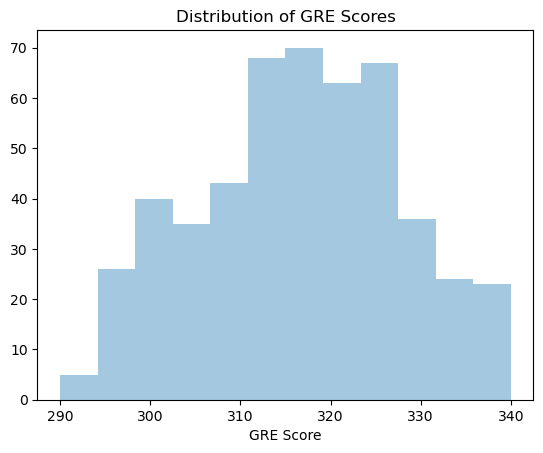

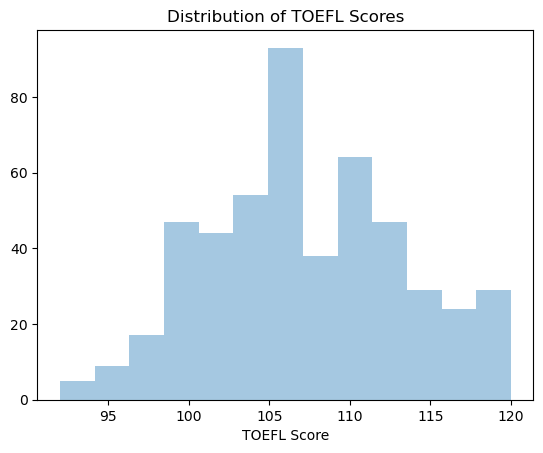

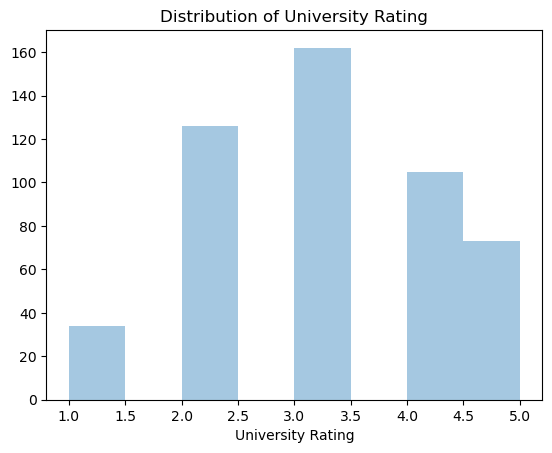

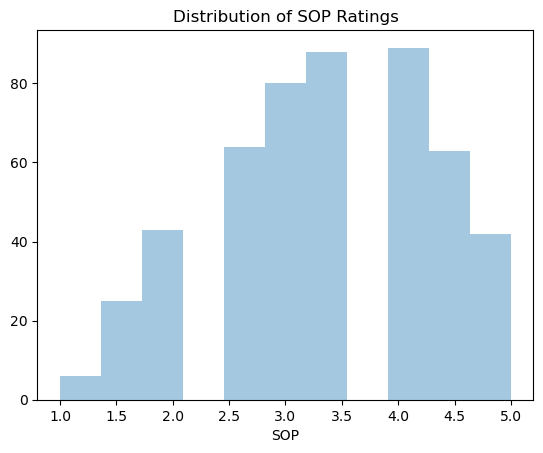

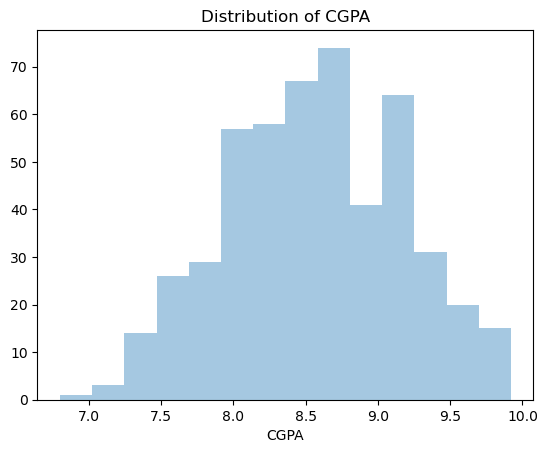

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

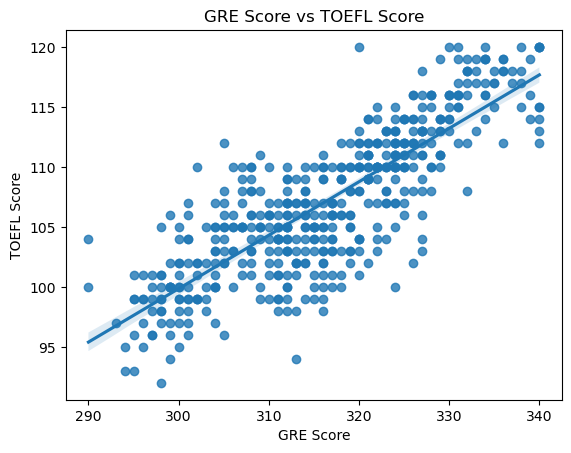

In [5]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

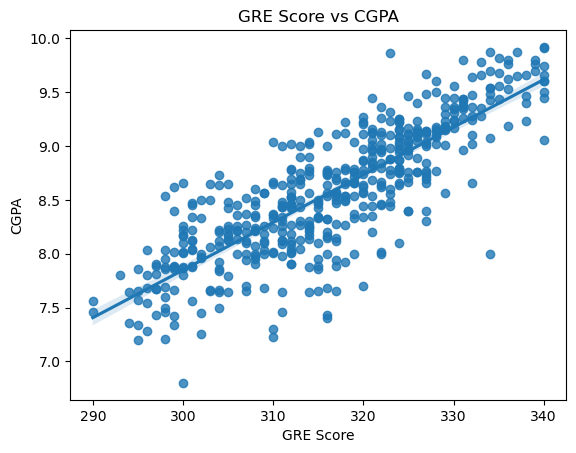

In [6]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

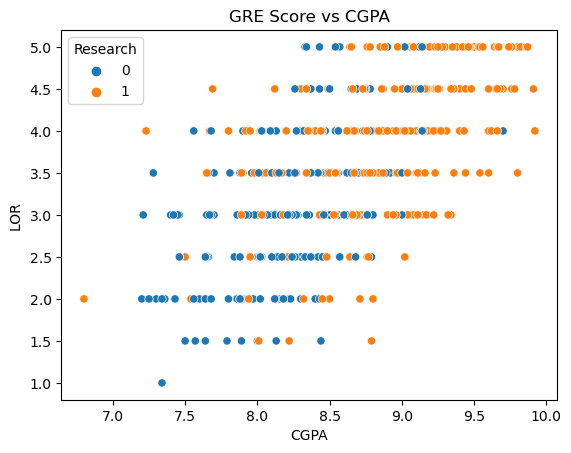

In [7]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

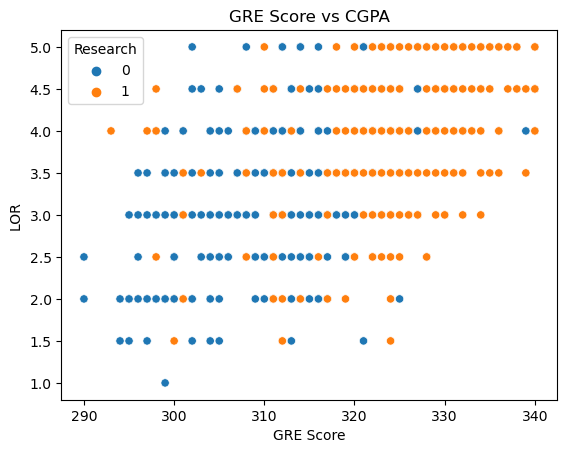

In [8]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

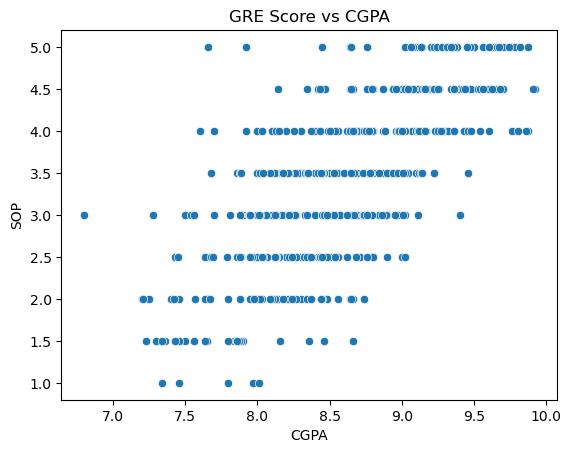

In [9]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

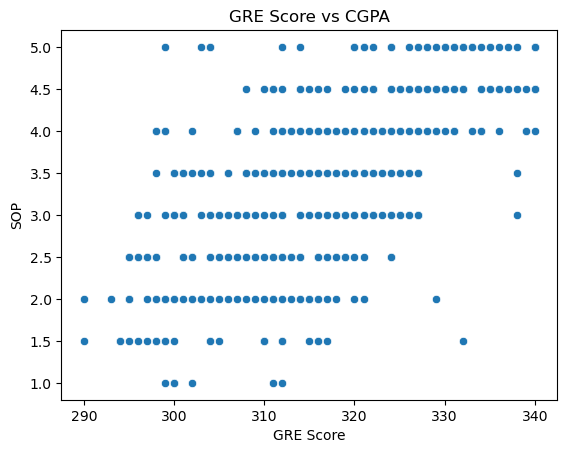

In [10]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

> Indented block

> Indented block





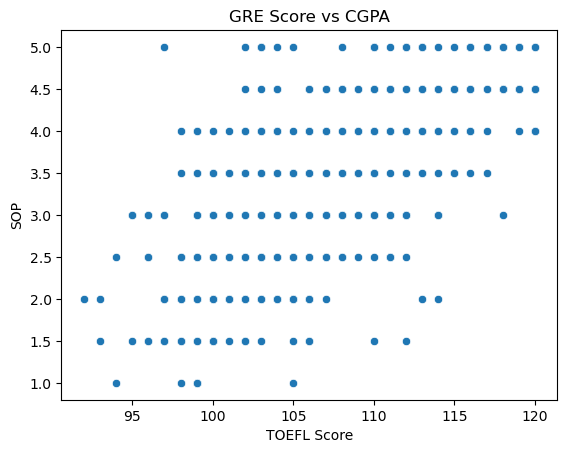

In [11]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation among variables**

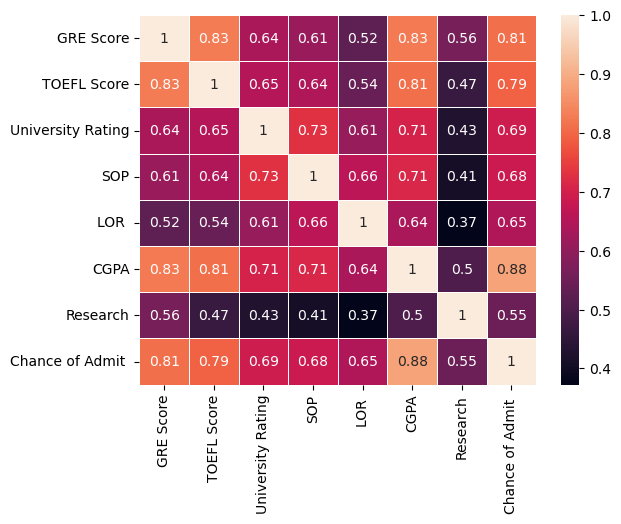

In [12]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)


In [15]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
145,320,113,2,2.0,2.5,8.64,1
367,311,98,1,1.0,2.5,7.46,0
286,336,118,5,4.5,4.0,9.19,1
75,329,114,2,2.0,4.0,8.56,1
87,317,107,2,3.5,3.0,8.28,0
...,...,...,...,...,...,...,...
407,298,100,3,2.5,4.0,7.95,1
261,312,104,3,3.5,4.0,8.09,0
484,317,106,3,3.5,3.0,7.89,1
262,308,103,2,2.5,4.0,8.36,1


In [16]:
y_train

145    0.81
367    0.57
286    0.92
75     0.72
87     0.66
       ... 
407    0.58
261    0.71
484    0.73
262    0.70
134    0.89
Name: Chance of Admit , Length: 400, dtype: float64

In [17]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)




In [18]:
X_train_std

array([[ 0.33181256,  0.97484193, -0.94672926, ..., -1.02411419,
         0.1287988 ,  0.87744601],
       [-0.46241963, -1.50883177, -1.80739223, ..., -1.02411419,
        -1.81285024, -1.13967126],
       [ 1.74378089,  1.80273316,  1.63525964, ...,  0.57815052,
         1.0338047 ,  0.87744601],
       ...,
       [ 0.0670685 , -0.1842058 , -0.0860663 , ..., -0.49002596,
        -1.10530017,  0.87744601],
       [-0.72716369, -0.68094054, -0.94672926, ...,  0.57815052,
        -0.33193148,  0.87744601],
       [ 1.47903683,  0.97484193,  1.63525964, ...,  0.57815052,
         1.18189658,  0.87744601]])

In [19]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)


In [20]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.331813,0.974842,-0.946729,-1.394120,-1.024114,0.128799,0.877446
1,-0.462420,-1.508832,-1.807392,-2.419209,-1.024114,-1.812850,-1.139671
2,1.743781,1.802733,1.635260,1.168601,0.578151,1.033805,0.877446
3,1.126045,1.140420,-0.946729,-1.394120,0.578151,-0.002838,0.877446
4,0.067068,-0.018628,-0.946729,0.143512,-0.490026,-0.463569,-1.139671
...,...,...,...,...,...,...,...
395,-1.609644,-1.177675,-0.086066,-0.881576,0.578151,-1.006572,0.877446
396,-0.374172,-0.515362,-0.086066,0.143512,0.578151,-0.776207,-1.139671
397,0.067068,-0.184206,-0.086066,0.143512,-0.490026,-1.105300,0.877446
398,-0.727164,-0.680941,-0.946729,-0.881576,0.578151,-0.331931,0.877446


Lets use a bunch of different algorithms to see which model performs better

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=1.0)] 
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

    #ADD MAPE

Results without removing features with multicollinearity ...
Linear Regression : 0.05891788325362782
Lasso Regression : 0.12220356079590955
Ridge Regression : 0.05892674136790212


In [22]:
for actual, predicted in zip(y_test, predictions):
    print(f'Actual: {actual} - Predicted: {predicted}')

Actual: 0.72 - Predicted: 0.6547621302455979
Actual: 0.68 - Predicted: 0.6691995831345735
Actual: 0.88 - Predicted: 0.8602407231926934
Actual: 0.63 - Predicted: 0.6128633010057475
Actual: 0.82 - Predicted: 0.8396977890708375
Actual: 0.72 - Predicted: 0.7321163137846727
Actual: 0.9 - Predicted: 0.897544701366408
Actual: 0.56 - Predicted: 0.550070268252769
Actual: 0.94 - Predicted: 0.9450687237001205
Actual: 0.86 - Predicted: 0.8940894217373627
Actual: 0.78 - Predicted: 0.7221857531118893
Actual: 0.7 - Predicted: 0.6509416807881615
Actual: 0.84 - Predicted: 0.8215661306535239
Actual: 0.79 - Predicted: 0.7881767221221316
Actual: 0.61 - Predicted: 0.6022894640269219
Actual: 0.73 - Predicted: 0.7201053356756679
Actual: 0.7 - Predicted: 0.7025348652659502
Actual: 0.58 - Predicted: 0.5591629364630124
Actual: 0.73 - Predicted: 0.7506172808226597
Actual: 0.59 - Predicted: 0.5344351325781511
Actual: 0.64 - Predicted: 0.619912592982287
Actual: 0.7 - Predicted: 0.7813168300869439
Actual: 0.44 - Pr

## Linear Regression using Statsmodel library

In [23]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     254.6
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.48e-141
Time:                        12:21:50   Log-Likelihood:                 559.63
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7197      0.00

In [24]:
X_train_new=X_train.drop(columns='SOP')

In [25]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     297.0
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.29e-142
Time:                        12:21:50   Log-Likelihood:                 559.17
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7197      0.00

## VIF(Variance Inflation Factor)

- “ VIF score of an independent variable represents how well the variable is explained by other independent variables.


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif


In [27]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.279523
2,TOEFL Score,3.862884
3,University Rating,2.206643
4,LOR,1.838390
5,CGPA,4.762272
6,Research,1.462379


### VIF looks fine and hence, we can go ahead with the predictions

In [28]:
X_test_std= std.transform(X_test)

In [29]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets


In [30]:
X_test = sm.add_constant(X_test)

In [31]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [32]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [33]:
X_test_new=X_test.drop(columns=X_test_del)

In [34]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04078070794605291
Root Mean Square Error  0.058524209931906095


## Mean of Residuals

In [35]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.003445707257701881


## Test for Homoscedasticity

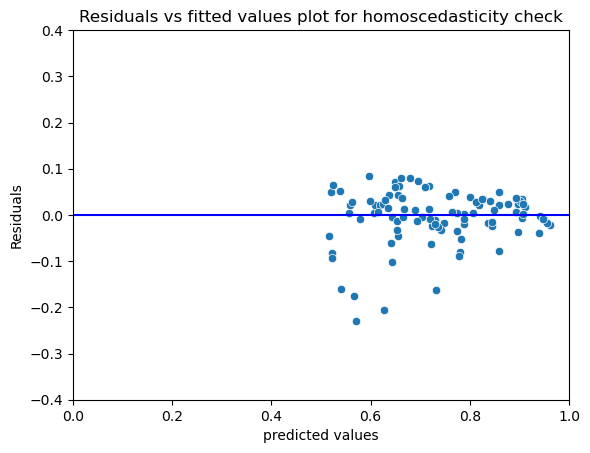

In [36]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.6694661848357384), ('p-value', 0.0502951362189263)]

#### Here `null hypothesis` is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

## Normality of residuals

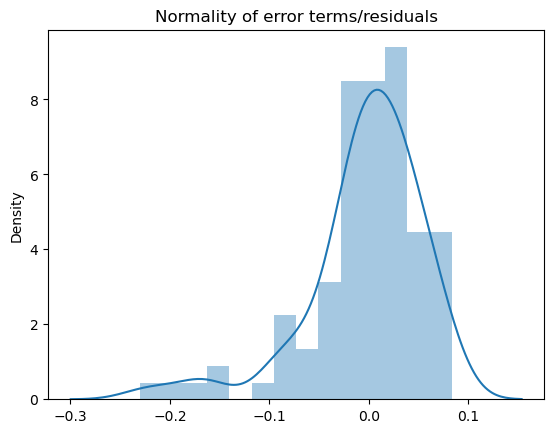

In [38]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

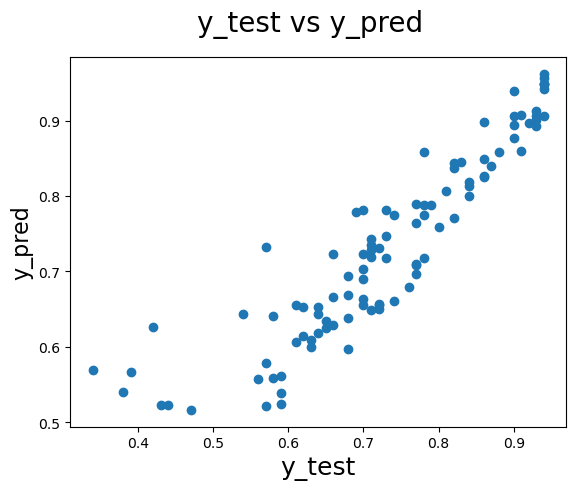

In [39]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [40]:
#INSIGHTS AND RECOMMENDATIONS